# Vaccination Dataset Cleaning And Sentiment Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Disseration/vaccination_tweets')
folder = os.path.join('/content/drive/My Drive/Disseration/vaccination_tweets')
!ls

Mounted at /content/drive
model1.h5  rnn_model.hdf5  vaccination_tweets.ipynb


## 1.Importing all the library

### 1.1 large installment

In [2]:
 !python3 -c "import nltk; nltk.download('all')"

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [3]:
pip install emojis

In [4]:
pip install dash


     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 1.0MB 18.1MB/s 
     |████████████████████████████████| 3.5MB 56.9MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
     |████████████████████████████████| 1.8MB 57.7MB/s 
     |████████████████████████████████| 358kB 65.4MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85834 sha256=e36b409c94520a749ddcc22388b7d71fc38c655075d300671ffbf65bbe796052
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014875 sha256=e4d7e6c25a49e7dcbe16b8b8571d4a97e885cc110b988e57e7307c641fee9512
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540993 sha256=ebe1bae6733cfcde25e9ac

In [5]:
pip install jupyter_dash

### 1.2 Importing the libraries required

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import string
import re
%matplotlib inline
import emojis

# NTLK
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords         
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Tenserflow
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM,SpatialDropout1D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Visualisation imports
import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import io
from base64 import b64encode
import missingno as ms
import matplotlib.pyplot as plt
import plotly.express as px



### 1.3 importing the Dataset

In [7]:
import pandas as pd
# Collecting data from my GITHUB (https://github.com/FabioPalliparambil98?tab=repositories)
df_vaccination = pd.read_csv('https://raw.githubusercontent.com/FabioPalliparambil98/COVID-19_Vaccination_Tweets/main/combined_vaccinationtweets.csv')
df_vaccination.head(3)


,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,DPWIMM,#StopAsianHate #OneHumanRace #JusticeForBrianS...,NaN,1783,6406,60190,22/06/2017 21:23,23/03/2021 11:16,304,RT @SFGate: Being protected from COVID-19 is t...,[]
1,olayinkaolamiju,Business account loading...Medical device plug...,Lagos,132,339,10822,09/02/2011 20:19,23/03/2021 11:16,360,RT @Forbes: Three fully vaccinated people catc...,[]
2,lalytatweets,💔🇮🇹 💔🇧🇴 💔🌎 Creative. Storyteller. Researcher. ...,NaN,779,571,24430,30/05/2014 19:49,23/03/2021 11:16,0,"And of course, let’s not forget the constant n...",[]


## 2.Data Pre-Processing

### 2.1 Removing NaN

In [8]:
print('Display the NaN values in the DataSet')
df_vaccination.isnull().sum()

Display the NaN values in the DataSet


username              0
acctdesc          11215
location          32424
following             0
followers             0
totaltweets           0
usercreatedts         0
tweetcreatedts        0
retweetcount          0
text                  0
hashtags              0
dtype: int64

In [9]:
print("Before the NaN value is removed")
print(df_vaccination.shape)
print('')
df_vaccination = df_vaccination.dropna()

print("After the NaN values is removed")
print(df_vaccination.shape)

Before the NaN value is removed
(173160, 11)

After the NaN values is removed
(137023, 11)


In [10]:
print('result after removing the NaN in the DataSet')
df_vaccination.isnull().sum()

result after removing the NaN in the DataSet


username          0
acctdesc          0
location          0
following         0
followers         0
totaltweets       0
usercreatedts     0
tweetcreatedts    0
retweetcount      0
text              0
hashtags          0
dtype: int64

### 2.2 Dropping Duplicates

In [11]:
print('After dropping duplicates')
print(df_vaccination.shape,"\n")

df_vaccination = df_vaccination.drop_duplicates()

print('After dropping duplicates')
print(df_vaccination.shape)

After dropping duplicates
(137023, 11) 

After dropping duplicates
(12511, 11)


### 2.3 Object to Datetime

In [12]:
df_vaccination['tweetcreatedts'] = pd.to_datetime(df_vaccination['tweetcreatedts'])
df_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12511 entries, 1 to 173158
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   username        12511 non-null  object        
 1   acctdesc        12511 non-null  object        
 2   location        12511 non-null  object        
 3   following       12511 non-null  int64         
 4   followers       12511 non-null  int64         
 5   totaltweets     12511 non-null  int64         
 6   usercreatedts   12511 non-null  object        
 7   tweetcreatedts  12511 non-null  datetime64[ns]
 8   retweetcount    12511 non-null  int64         
 9   text            12511 non-null  object        
 10  hashtags        12511 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 1.1+ MB


### 2.4 resetting the index for pandas dataframe

In [13]:
# resetting the index available
df_vaccination.reset_index(drop=True, inplace=True)

### 2.5 Extracting Day, Hour, Month and Date

In [14]:
df_vaccination['Month'] = df_vaccination.tweetcreatedts.dt.month
df_vaccination['Hour'] = df_vaccination.tweetcreatedts.dt.hour
df_vaccination['day_in_week'] = df_vaccination.tweetcreatedts.dt.weekday
df_vaccination['day'] = df_vaccination.tweetcreatedts.dt.day

In [15]:
print('before changing numeric to characters')
print(df_vaccination.day_in_week.unique())
print("\n")

df_vaccination['day_in_week'].replace(0, 'Monday',inplace=True)
df_vaccination['day_in_week'].replace(1, 'Tuesday',inplace=True)
df_vaccination['day_in_week'].replace(2, 'Wednesday',inplace=True)
df_vaccination['day_in_week'].replace(3, 'Thursday',inplace=True)
df_vaccination['day_in_week'].replace(4, 'Friday',inplace=True)
df_vaccination['day_in_week'].replace(5, 'Saturday',inplace=True)
df_vaccination['day_in_week'].replace(6, 'Sunday',inplace=True)

print('After changing numeric to characters')
print(df_vaccination.day_in_week.unique())

before changing numeric to characters
[1 2 4 5 6 3 0]


After changing numeric to characters
['Tuesday' 'Wednesday' 'Friday' 'Saturday' 'Sunday' 'Thursday' 'Monday']


## 3.Sentiment Analysis Data Preparation 

### 3.1 Cleaning the Text

In [16]:
def clean_data(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'^RT[\s]+', '', text)
    text = emojis.decode(text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'_', '', text)
    text = re.sub(r'[0-9]', '', text)
    text = re.sub('@[^\s]+', '', text)
    text = re.sub(r'[^\w\s]',' ', text)
    text = text.lower()
    return text

df_vaccination['text'] = df_vaccination['text'].apply(lambda x: clean_data(x))

df_vaccination['location'] = df_vaccination['location'].apply(lambda x: clean_data(x))

df_vaccination.head(1)



,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,Month,Hour,day_in_week,day
0,olayinkaolamiju,Business account loading...Medical device plug...,lagos,132,339,10822,09/02/2011 20:19,2021-03-23 11:16:00,360,forbes three fully vaccinated people catch cov...,[],3,11,Tuesday,23


### 3.2 Words Lemmatizer 

In [17]:
wn = nltk.WordNetLemmatizer()

df_vaccination['text'] = df_vaccination['text'].apply(lambda x: wn.lemmatize(x))

### 3.3 Tokenizing the words 

In [18]:
maximum_words = 1000
maximum_length = 100

tokenizer = Tokenizer(num_words=maximum_words, split=' ')
tokenizer.fit_on_texts(df_vaccination['text'].values)
X = tokenizer.texts_to_sequences(df_vaccination['text'].values)

### 3.4 Padding the Tokenized sequence

In [19]:
X_padded = pad_sequences(X)

In [20]:
X_padded

array([[  0,   0,   0, ..., 125,  50,   2],
       [  0,   0,   0, ..., 298, 150, 465],
       [  0,   0,   0, ...,  53,  28,  53],
       ...,
       [  0,   0,   0, ...,  31, 827,  65],
       [  0,   0,   0, ..., 214, 157,  47],
       [  0,   0,   0, ...,  32,   1,   2]], dtype=int32)

### 3.5 Model Prediction

In [21]:
from keras.models import load_model
model = load_model('rnn_model.hdf5')

In [22]:
predictions = model.predict(X_padded)
predictions

array([[0.57392293],
       [0.39682424],
       [0.37197208],
       ...,
       [0.31247377],
       [0.05995035],
       [0.28729856]], dtype=float32)

In [23]:
results = []

for i in predictions:    
  predicted_classes = np.argmax(i)
  if predicted_classes < 0.5:
    results.append(predicted_classes)
  else:
    results.append(predicted_classes)
  predicted_classes

In [24]:
df_vaccination['sentiment'] = results

In [25]:
df_vaccination.head(5)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,Month,Hour,day_in_week,day,sentiment
0,olayinkaolamiju,Business account loading...Medical device plug...,lagos,132,339,10822,09/02/2011 20:19,2021-03-23 11:16:00,360,forbes three fully vaccinated people catch cov...,[],3,11,Tuesday,23,0
1,KnillJames,Progressive accountants serving businesses acr...,lewes england,493,507,1888,25/10/2011 11:33,2021-03-23 11:16:00,0,reminder vat payments deferred because of th...,[],3,11,Tuesday,23,0
2,jaycyclopedia,#ジェイ：私はあなたを愛しています、そしてそれはいつもあなたです、私は約束します。,sheher,1436,1657,2020,14/12/2020 09:28,2021-03-23 11:16:00,91,ljmiran not jam magno attacking liza soberano ...,[],3,11,Tuesday,23,0
3,Hylinee,Visit our shop located along Tom Mboya street ...,nairobi kenya,4565,21350,27433,20/05/2020 08:33,2021-03-23 11:16:00,0,covid is real stay safe,[],3,11,Tuesday,23,0
4,DeeDeeDoolan,Musician | PhD | Teacher | nature | books | So...,sheffieldukeurope,384,328,6456,09/06/2019 22:25,2021-03-23 11:16:00,21,reuters france s covid figures are going up at...,[],3,11,Tuesday,23,0


## 4.Visualisations

### 4.1 word cloud Visualisation

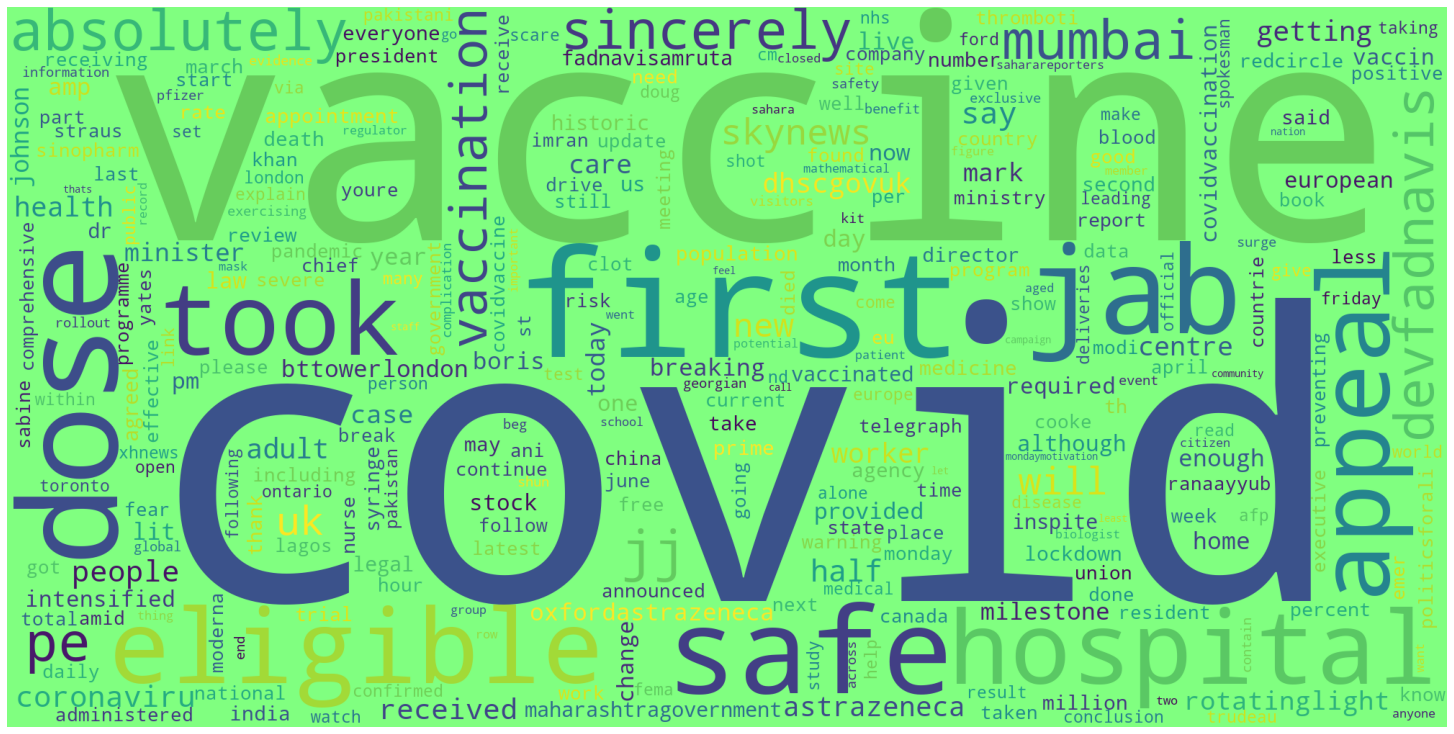

In [26]:
from wordcloud import WordCloud


wordcloud = WordCloud(background_color="#80ff80", max_words=300, width=2000, height=1000, collocations=False).generate(" ".join(df_vaccination[df_vaccination.sentiment == 0].text))

plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### 4.3 Bar Chart
retween and hour visualisation


In [ ]:


days = df_vaccination.day_in_week.unique()
buffer = io.StringIO()

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()


colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Build App
app = JupyterDash(__name__)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Bar Chart',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Finding wether there is a relation between speed and the Accident Severity', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    
     html.Div(
        [
            dcc.Dropdown(
                id="dropdown",
                options=[{"label": x, "value": x} for x in days],
                value=days[0],
                clearable=False),
        ],
         style={'width': '25%',
               'display': 'inline-block', 'borderRadius':5,
        'padding':10, 'width':300}),

    dcc.Graph(
        id='graph'
    )
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])

def update_bar_chart(days):
    mask = df_vaccination["day_in_week"] == days
    fig = px.bar(df_vaccination[mask], x="Hour", y="retweetcount", barmode="overlay")
    fig.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        width=1800, height=800, bargap=0.05)
    
    return fig

app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

### 4.4 Barchart using Dash and Dropdown


In [ ]:


days = df_vaccination.sentiment.unique()
buffer = io.StringIO()

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()


colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Build App
app = JupyterDash(__name__)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Bar Chart',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Finding wether there is a relation between speed and the Accident Severity', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    
     html.Div(
        [
            dcc.Dropdown(
                id="dropdown",
                options=[{"label": x, "value": x} for x in days],
                value=days[0],
                clearable=False),
        ],
         style={'width': '25%',
               'display': 'inline-block', 'borderRadius':5,
        'padding':10, 'width':300}),

    dcc.Graph(
        id='graph'
    )
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])

def update_bar_chart(days):
    mask = df_vaccination["sentiment"] == days
    fig = px.bar(df_vaccination[mask], x="day_in_week", y="retweetcount", barmode="overlay")
    fig.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        width=1800, height=800, bargap=0.05)
    
    return fig

app.run_server(debug=True)

### 4.5 Scatter Line Chart


In [ ]:
import plotly.graph_objects as go

scatter_line_vaccination = go.Figure(data=go.Scatter(
    x=df_vaccination['location'].unique(),
    y=df_vaccination['retweetcount'],
    mode='lines+markers',
    name='lines+markers',
    marker_color='rgba(255, 182, 193, .9)'
    # mode='markers'
))
scatter_line_vaccination.show()